In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore")

# Comparing Two Samples

In [2]:
births = Table.read_table('baby.csv')
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight.show(6)

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138


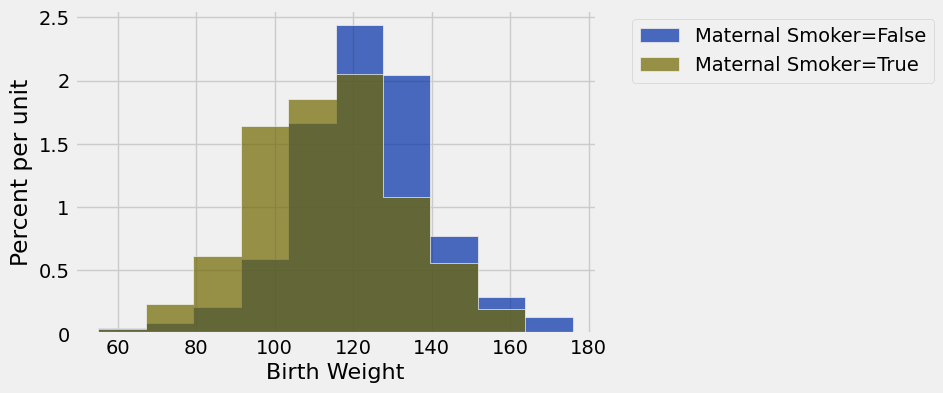

In [3]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [4]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


Null hypothesis: In the population, the distribution of birth weights of babies is the same for mothers who don’t smoke as for mothers who do. The difference in the sample is due to chance.

Alternative hypothesis: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

# Review: Exploring Null Hypothesis with One Sample

Step 1. Write a function to simulate one occurrence of the test statistic.

Step 2. Collect many simulated instances of the test statistic (for loop and np.append).

Step 3. Load outcomes into a table (Table().with_column)

Step 4. Visualize the outcomes with a histogram (hist)

Step 5. Calculate the p-value of the observed statistic (np.count_nonzero).

# New: Exploring Null Hypothesis with Two Samples

Step 1. Write a function to simulate one occurrence of the test statistic WHICH COMPARES THE TWO SAMPLES.

Step 2. Collect many simulated instances of the test statistic BY PERMUTING CATEGORY LABELS OF THE DATA SET TO GENERATE VARIETY (sample without replacement to permute, for loop, and np.append).

Step 3. Load outcomes into a table (Table().with_column)

Step 4. Visualize the outcomes with a histogram (hist)

Step 5. Calculate the p-value of the observed statistic (np.count_nonzero).

# Step 1: Simulate Test Statistic

Write a function called difference_of_means. It takes a table and the name of the column containing the category labels as inputs. It returns the the average "smoking" birth weight minus the average "nonsmoking" birth weight.


In [24]:
def difference_of_means(tbl, label_column):
    means_table = tbl.group(label_column, np.average)
    means_array = means_table.column(1)
    return means_array.item(1) - means_array.item(0)

In [25]:
observed_difference = difference_of_means(smoking_and_birthweight, 'Maternal Smoker')
observed_difference

-9.266142572024918

# Step 2: Permute the Category Labels

In [31]:
staff = Table().with_columns(
    'Names', make_array('Jim', 'Pam', 'Dwight', 'Michael'),
    'Ages', make_array(29, 28, 34, 41)
)

staff

Names,Ages
Jim,29
Pam,28
Dwight,34
Michael,41


In [30]:
# Sampling without replacement means the same row cannot be selected twice.
# Sampling without providing a number of rows will produce a table with the same number of rows as the original.
# This example therefore produces a random permutation (shuffling) of the original table.
shuffled_staff = staff.sample(with_replacement = False)
shuffled_staff

Names,Ages
Dwight,34
Jim,29
Michael,41
Pam,28


In [28]:
staff_combined = staff.with_column('Shuffled', shuffled_staff.column(0))
staff_combined

Names,Ages,Shuffled
Jim,29,Pam
Pam,28,Jim
Dwight,34,Pam
Michael,41,Dwight


Provide the code to shuffle the "Maternal Smoker" label in our set and attached the shuffled labels back on the table.

In [39]:
shuffled_smoker = smoking_and_birthweight.sample(with_replacement= False)
shuffled_smoker

smoker_combined = smoking_and_birthweight.with_column("Shuffled", shuffled_smoker.column(0))
smoker_combined = smoker_combined.select("Shuffled", "Birth Weight")
smoker_combined

Shuffled,Birth Weight
True,120
False,113
True,128
True,108
False,136
True,138
True,132
True,120
False,143
False,140


# Step 2 Continued: Iteration

In [45]:
differences = make_array()

# for many iterations
    # create a new table with a third column of shuffled "Maternal Smoker" labels
    # calculate the value of the test statistic for the shuffled version
    # append the outcome to your array
for i in range(1000):
    shuffled_smoker = smoking_and_birthweight.sample(with_replacement= False)
    smoker_combined = smoking_and_birthweight.with_column("Shuffled", shuffled_smoker.column(0))
    smoker_combined = smoker_combined.select("Shuffled", "Birth Weight")
    outcomes = difference_of_means(smoker_combined, "Shuffled")
    differences = np.append(differences, outcomes)
    
differences

array([  1.11861602e+00,   3.56661639e-01,   1.20563097e-01,
         1.30821031e+00,   2.18821396e+00,  -1.66806222e+00,
         5.06906166e-01,   1.52758353e-01,   4.74710910e-01,
         1.13408596e-01,   9.21867240e-01,  -4.64067523e-03,
        -4.76837759e-01,   9.29021741e-01,   4.56824657e-01,
         2.04000792e-02,   4.21052150e-01,   1.07926627e+00,
         3.88856895e-01,  -8.66758079e-01,   1.77799107e-01,
        -1.37472767e+00,   1.90918842e+00,   9.32598991e-01,
        -9.27571339e-01,   1.96642443e+00,  -5.51960023e-01,
         8.57476728e-01,   9.89835002e-01,   2.95848378e-01,
         1.82333440e+00,   3.70970642e-01,   1.06254094e-01,
         1.20089279e+00,   1.13408596e-01,   1.96284717e+00,
         2.99425629e-01,  -2.07944604e+00,   3.85279644e-01,
        -9.84807350e-01,   1.23666530e+00,  -4.19601749e-01,
         4.17474900e-01,   5.28369670e-01,  -7.95213066e-01,
        -1.25667840e+00,   2.04000792e-02,   4.28206652e-01,
         8.36013224e-01,

# Step 3 and 4: Create a Table and Visualize the Data

Observed Difference: -9.266142572024918


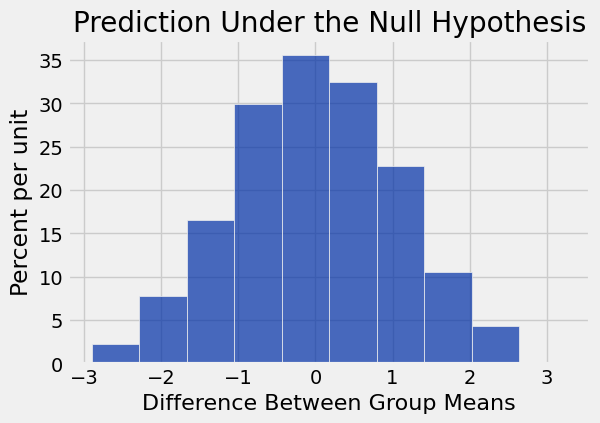

In [46]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

# Step 5: Calculate the p-value

Calculate the percent of all simulated differences that favor the alternative hypothesis.

In [47]:
# How many simulated differences favor the alternative hypothesis?

# How many simulated differences are there in total?

# What percent of simulated differences favor the alternative hypothesis?
less_than_neg9 = np.count_nonzero(differences <= observed_difference)
total_length = len(differences)
p_value = less_than_neg9 / total_length
p_value

0.0